In [ ]:
"""
Notebook for training the transformer model for the Rossler system.
=====
Distributed by: Notre Dame SCAI Lab (MIT Liscense)
- Associated publication:
url: https://arxiv.org/abs/2010.03957
doi:
github: https://github.com/zabaras/transformer-physx
=====
"""
!nvidia-smi

Fri Jun 14 15:20:20 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Environment Setup

Use pip to install from [PyPI](https://pypi.org/project/trphysx/).


In [ ]:
!pip install trphysx==0.0.7

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 1.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

First mount google drive and clone transformer physx repo.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/
%mkdir -p transformer_physx/Repressilator
%cd transformer_physx/Repressilator

/content/gdrive/MyDrive
/content/gdrive/MyDrive/transformer_physx/Repressilator


## Downloading Data and Models

Now lets download the training and validation data for the Rossler system. Info on wget from [Google drive](https://stackoverflow.com/questions/37453841/download-a-file-from-google-drive-using-wget). This will eventually be update to zenodo repo.

In [ ]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [ ]:
# Updated it with the links from your google drive where generated data is residing
!wget 'https://docs.google.com/uc?export=download&id=1zJgNPF2jVnIBy0zod6XnFGKj4OHdGs9t' -O ./data/Repressilator_training_1.hdf5
!wget 'https://docs.google.com/uc?export=download&id=1wGGAf077MbZ7gBdz0s3RI5nZIY-fSCVt' -O ./data/Repressilator_valid_1.hdf5

--2024-06-14 15:23:25--  https://docs.google.com/uc?export=download&id=1zJgNPF2jVnIBy0zod6XnFGKj4OHdGs9t
Resolving docs.google.com (docs.google.com)... 74.125.24.101, 74.125.24.113, 74.125.24.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.24.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1zJgNPF2jVnIBy0zod6XnFGKj4OHdGs9t&export=download [following]
--2024-06-14 15:23:26--  https://drive.usercontent.google.com/download?id=1zJgNPF2jVnIBy0zod6XnFGKj4OHdGs9t&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.12.132, 2404:6800:4003:c11::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.12.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6396672 (6.1M) [application/octet-stream]
Saving to: ‘./data/Repressilator_training_1.hdf5’

./data/Repressilato 100%[===================>]   6.

Next lets download a pretrained embedding model. You can replace with with your own if you want.

In [ ]:
#https://drive.google.com/file/d/10idkeFwjupjzV0IRt3UIj_8cMYwF5y7e/view?usp=sharing
#https://drive.google.com/file/d/10idkeFwjupjzV0IRt3UIj_8cMYwF5y7e/view?usp=sharing

!wget 'https://docs.google.com/uc?export=download&id=10n6eelZNduS4Z3GoCK_dqWMLNDGAymqS' -O ./embedding_Repressilator300.pth

#!wget -O ./embedding_Repressilator300.pth "https://drive.google.com/uc?export=download&id=1V0MMh8dm5E8OiZTc8xMaiAjjcswdP1nL"

--2024-06-14 15:23:37--  https://docs.google.com/uc?export=download&id=10n6eelZNduS4Z3GoCK_dqWMLNDGAymqS
Resolving docs.google.com (docs.google.com)... 74.125.24.101, 74.125.24.113, 74.125.24.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.24.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=10n6eelZNduS4Z3GoCK_dqWMLNDGAymqS&export=download [following]
--2024-06-14 15:23:38--  https://drive.usercontent.google.com/download?id=10n6eelZNduS4Z3GoCK_dqWMLNDGAymqS&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.12.132, 2404:6800:4003:c11::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.12.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149974 (146K) [application/octet-stream]
Saving to: ‘./embedding_Repressilator300.pth’

./embedding_Repress 100%[===================>] 146.46K  

# Transformer-PhysX Rossler System

The Rossler system is **not** a prebuilt example in trphysx thus we need to create four classes for our numerical example:
- *Config class* - Embedding and mainly transformer architecture parameters
- *Embedding class* - Convert states into embedding vector
- *Visualization class* - Visualize predictions
- *Transformer dataset class* - Create dataset for training

Fortunately trphysx has base classes for all of these that contain both useful methods and as well as abstract declarations to help guide you.

In [ ]:
import sys
import os
import logging
import h5py
import torch
import torch.nn as nn
import numpy as np

from typing import Dict, List, Tuple
# Torch imports
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
from torch.optim.lr_scheduler import ExponentialLR
# Trphysx imports
from trphysx.config import HfArgumentParser
from trphysx.config.args import ModelArguments, TrainingArguments, DataArguments, ArgUtils
from trphysx.embedding import EmbeddingModel
from trphysx.config.configuration_phys import PhysConfig
from trphysx.data_utils.dataset_phys import PhysicalDataset
from trphysx.transformer import PhysformerTrain, PhysformerGPT2
from trphysx.utils.trainer import Trainer

Tensor = torch.Tensor
TensorTuple = Tuple[torch.Tensor]
FloatTuple = Tuple[float]

logger = logging.getLogger(__name__)

logging.basicConfig(
    filename='logging.log',
    filemode='a',
    format="%(asctime)s - %(levelname)s - %(name)s -   %(message)s",
    datefmt="%m/%d/%Y %H:%M:%S",
    level=logging.DEBUG,
    force=True,)


logger.info("Torch device: {}")

In [ ]:
logger.info("#####################################################################################")
logger.info("A new training is started")

Set training arguments. For running this outside of a notebook, you would use "sys.argv" and then no argument when you parse args into dataclasses. This would allow the use of command line parameters as well.

In [ ]:
argv = []
argv = argv + ["--init_name", "rossler"]
argv = argv + ["--embedding_file_or_path", "./embedding_Repressilator300.pth"]
argv = argv + ["--training_h5_file","./data/Repressilator_training.hdf5"]
argv = argv + ["--eval_h5_file","./data/Repressilator_valid.hdf5"]
argv = argv + ["--train_batch_size", "32"]
argv = argv + ["--stride", "16"]
argv = argv + ["--block_size", "16"]
argv = argv + ["--n_train", "2048"]
argv = argv + ["--n_eval", "32"]
argv = argv + ["--save_steps", "25"]


## Rossler Config Class

In [ ]:
class RosslerConfig(PhysConfig):
    """
    This is the configuration class for the modeling of the Rossler system.
    """

    model_type = "rossler"

    def __init__(
        self,
        n_ctx=32,
        n_embd=32,
        n_layer=4,
        n_head=4, # n_head must be a factor of n_embd
        state_dims=[3],
        activation_function="gelu_new",
        initializer_range=0.02,
        **kwargs
    ):
        super().__init__(
            n_ctx=n_ctx,
            n_embd=n_embd,
            n_layer=n_layer,
            n_head=n_head,
            state_dims=state_dims,
            activation_function=activation_function,
            initializer_range=initializer_range,
            **kwargs
        )

## Embedding Neural Network Class

Note here that we only need a subset of the methods needed for training the embedding model namely we just need "embed" and "recover" methods.

In [ ]:
class RosslerEmbedding(EmbeddingModel):
    """Embedding model for the Rossler ODE system

    Args:
        config (PhysConfig) Configuration class with transformer/embedding parameters
    """
    model_name = "embedding_rossler"

    def __init__(self, config: PhysConfig) -> None:
        """Constructor method
        """
        super().__init__(config)

        hidden_states = int(abs(config.state_dims[0] - config.n_embd)/2) + 1
        hidden_states = 500

        self.observableNet = nn.Sequential(
            nn.Linear(config.state_dims[0], hidden_states),
            nn.ReLU(),
            nn.Linear(hidden_states, config.n_embd),
            nn.LayerNorm(config.n_embd, eps=config.layer_norm_epsilon),
            nn.Dropout(config.embd_pdrop)
        )

        self.recoveryNet = nn.Sequential(
            nn.Linear(config.n_embd, hidden_states),
            nn.ReLU(),
            nn.Linear(hidden_states, config.state_dims[0])
        )
        # Learned koopman operator
        # Learns skew-symmetric matrix with a diagonal
        self.obsdim = config.n_embd
        self.kMatrixDiag = nn.Parameter(torch.linspace(1, 0, config.n_embd))

        xidx = []
        yidx = []
        for i in range(1, 3):
            yidx.append(np.arange(i, config.n_embd))
            xidx.append(np.arange(0, config.n_embd-i))

        self.xidx = torch.LongTensor(np.concatenate(xidx))
        self.yidx = torch.LongTensor(np.concatenate(yidx))
        self.kMatrixUT = nn.Parameter(0.1*torch.rand(self.xidx.size(0)))
        # Normalization occurs inside the model
        self.register_buffer('mu', torch.tensor([0., 0., 0.]))
        self.register_buffer('std', torch.tensor([1., 1., 1.]))
        print('Number of embedding parameters: {}'.format( super().num_parameters ))

    def embed(self, x: Tensor) -> Tensor:
        """Embeds tensor of state variables to Koopman observables

        Args:
            x (Tensor): [B, 3] input feature tensor

        Returns:
            (Tensor): [B, config.n_embd] Koopman observables
        """
        x = self._normalize(x)
        g = self.observableNet(x)
        return g

    def recover(self, g: Tensor) -> Tensor:
        """Recovers feature tensor from Koopman observables

        Args:
            g (Tensor): [B, config.n_embd] Koopman observables

        Returns:
            (Tensor): [B, 3] Physical feature tensor
        """
        out = self.recoveryNet(g)
        x = self._unnormalize(out)
        return x

    def _normalize(self, x: Tensor) -> Tensor:
        return (x - self.mu.unsqueeze(0))/self.std.unsqueeze(0)

    def _unnormalize(self, x: Tensor) -> Tensor:
        return self.std.unsqueeze(0)*x + self.mu.unsqueeze(0)

## Rossler Visualization Class

In [ ]:
import matplotlib as mpl
mpl.use('agg')
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib.patches import Rectangle
from matplotlib.legend_handler import HandlerBase
from trphysx.viz import Viz

# Interface to LineCollection:
def _colorline3d(x, y, z, t=None, cmap=plt.get_cmap('viridis'), linewidth=1, alpha=1.0, ax=None):
    '''
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    https://stackoverflow.com/questions/52884221/how-to-plot-a-matplotlib-line-plot-using-colormap
    '''
    # Default colors equally spaced on [0,1]:
    if t is None:
        t = np.linspace(0.25, 1.0, len(x))
    if ax is None:
        ax = plt.gca()

    points = np.array([x, y, z]).T.reshape(-1, 1, 3)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    colors = np.array([cmap(i) for i in t])
    lc = Line3DCollection(segments, colors=colors, linewidth=linewidth,  alpha=alpha)
    ax.add_collection(lc)
    ax.scatter(x, y, z, c=colors, marker='*', alpha=alpha) #Adding line markers

class HandlerColormap(HandlerBase):
    def __init__(self, cmap, num_stripes=8, **kw):
        HandlerBase.__init__(self, **kw)
        self.cmap = cmap
        self.num_stripes = num_stripes
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        stripes = []
        for i in range(self.num_stripes):
            s = Rectangle([xdescent + i * width / self.num_stripes, ydescent],
                          width / self.num_stripes,
                          height,
                          fc=self.cmap((2 * i + 1) / (2 * self.num_stripes)),
                          transform=trans)
            stripes.append(s)
        return stripes

class RepressilatorViz(Viz):
    """Visualization class for Rosler ODE

    Args:
        plot_dir (str, optional): Directory to save visualizations in. Defaults to None.
    """
    def __init__(self, plot_dir:str = None) -> None:
        super().__init__(plot_dir=plot_dir)

    def plotPrediction(self,
        y_pred: Tensor,
        y_target: Tensor,
        plot_dir: str = None,
        epoch: int = None,
        pid: int = 0,
        nsteps: int = 256
    ) -> None:
        """Plots a 3D line of a single Rossler prediction

        Args:
            y_pred (Tensor): [T, 3] Prediction tensor.
            y_target (Tensor): [T, 3] Target tensor.
            plot_dir (str, optional): Directory to save figure, overrides plot_dir one if provided. Defaults to None.
            epoch (int, optional): Current epoch, used for file name. Defaults to None.
            pid (int, optional): Optional plotting id for indexing file name manually. Defaults to 0.
            nsteps (int, optional): Number of steps to plot. Defaults to 256.
        """
        # Convert to numpy array
        y_pred = y_pred[:nsteps].detach().cpu().numpy()
        y_target = y_target[:nsteps].detach().cpu().numpy()

        plt.close('all')
        mpl.rcParams['font.family'] = ['serif'] # default is sans-serif
        mpl.rcParams['figure.dpi'] = 300
        # rc('text', usetex=True)
        # Set up figure
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(1, 1, 1, projection='3d')

        cmaps = [plt.get_cmap("Reds"), plt.get_cmap("Blues")]
        _colorline3d(y_pred[:,0], y_pred[:,1], y_pred[:,2], cmap=cmaps[0], ax=ax)
        _colorline3d(y_target[:,0], y_target[:,1], y_target[:,2], cmap=cmaps[1], ax=ax)

        ax.set_xlim([np.amin(y_target[:,0])-5, np.amax(y_target[:,0])+5])
        ax.set_ylim([np.amin(y_target[:,1])-5, np.amax(y_target[:,1])+5])
        ax.set_zlim([np.amin(y_target[:,2])-5, np.amax(y_target[:,2])+5])

        cmap_handles = [Rectangle((0, 0), 1, 1) for _ in cmaps]
        handler_map = dict(zip(cmap_handles,
                            [HandlerColormap(cm, num_stripes=8) for cm in cmaps]))
        # Create custom legend with color map rectangels
        ax.legend(handles=cmap_handles, labels=['Prediction','Target'], handler_map=handler_map, loc='upper right', framealpha=0.95)

        if(not epoch is None):
            file_name = 'rosslerPred{:d}_{:d}'.format(pid, epoch)
        else:
            file_name = 'rosslerPred{:d}'.format(pid)

        self.saveFigure(plot_dir, file_name)

    def plotMultiPrediction(self,
        y_pred: Tensor,
        y_target: Tensor,
        plot_dir: str = None,
        epoch: int = None,
        pid: int = 0,
        nplots: int = 2
    ) -> None:
        """Plots the 3D lines of multiple Lorenz predictions

        Args:
            y_pred (Tensor): [T, 3] Prediction tensor.
            y_target (Tensor): [T, 3] Target tensor.
            plot_dir (str, optional): Directory to save figure, overrides plot_dir one if provided. Defaults to None.
            epoch (int, optional): Current epoch, used for file name. Defaults to None.
            pid (int, optional): Optional plotting id for indexing file name manually, Defaults to 0.
            nplots (int, optional): Number of cases to plot, Defaults to 2.
        """
        assert y_pred.size(0) >= nplots, 'Number of provided predictions is less than the requested number of subplots'
        assert y_target.size(0) >= nplots, 'Number of provided targets is less than the requested number of subplots'
        # Convert to numpy array
        y_pred = y_pred.detach().cpu().numpy()
        y_target = y_target.detach().cpu().numpy()

        plt.close('all')
        mpl.rcParams['font.family'] = ['serif']  # default is sans-serif
        mpl.rcParams['figure.dpi'] = 300
        # rc('text', usetex=True)
        # Set up figure
        fig, ax = plt.subplots(1, nplots, figsize=(6*nplots, 6), subplot_kw={'projection': '3d'})
        plt.subplots_adjust(wspace=0.025)

        cmaps = [plt.get_cmap("Reds"), plt.get_cmap("Blues")]
        for i in range(nplots):
            _colorline3d(y_pred[i, :, 0], y_pred[i, :, 1], y_pred[i, :, 2], cmap=cmaps[0], ax=ax[i], alpha=0.6)
            _colorline3d(y_target[i, :, 0], y_target[i, :, 1], y_target[i, :, 2], cmap=cmaps[1], ax=ax[i], alpha=0.6)

            ax[i].set_xlim([np.amin(y_target[:,0])-5, np.amax(y_target[:,0])+5])
            ax[i].set_ylim([np.amin(y_target[:,1])-5, np.amax(y_target[:,1])+5])
            ax[i].set_zlim([np.amin(y_target[:,2])-5, np.amax(y_target[:,2])+5])

            ax[i].set_xlabel('x', fontsize=14)
            ax[i].set_ylabel('y', fontsize=14)
            ax[i].set_zlabel('z', fontsize=14)
        cmap_handles = [Rectangle((0, 0), 1, 1) for _ in cmaps]
        handler_map = dict(zip(cmap_handles,
                               [HandlerColormap(cm, num_stripes=10) for cm in cmaps]))

        # Create custom legend with color map rectangels
        ax[-1].legend(handles=cmap_handles, labels=['Prediction', 'Target'], handler_map=handler_map, loc='upper right',
                  framealpha=0.95)

        if epoch is not None:
            file_name = 'rosslerMultiPred{:d}_{:d}'.format(pid, epoch)
        else:
            file_name = 'rosslerMultiPred{:d}'.format(pid)

        self.saveFigure(plot_dir, file_name)

## Transformer Dataset Class

Similar to the  built in examples to create a data-set for a physics transformer the "embed_data" method needs to be overloaded which tells trphysx how to transformer states into an embedded vector.

In [ ]:
class RosslerDataset(PhysicalDataset):
    """Dataset for the Rossler numerical example
    """
    def embed_data(self, h5_file: h5py.File, embedder: EmbeddingModel) -> None:
        """Embeds rossler data into a 1D vector representation for the transformer.

        Args:
            h5_file (h5py.File): HDF5 file object of raw data
            embedder (EmbeddingModel): Embedding neural network
        """
        # Iterate through stored time-series
        samples = 0
        for key in h5_file.keys():
            data_series = torch.Tensor(h5_file[key]).to(embedder.devices[0]).view([-1] + embedder.input_dims)
            with torch.no_grad():
                embedded_series = embedder.embed(data_series).cpu()
            # Stride over time-series
            for i in range(0, data_series.size(0) - self.block_size + 1,
                           self.stride):  # Truncate in block of block_size
                data_series0 = embedded_series[i: i + self.block_size]
                self.examples.append(data_series0)

                if self.eval:
                    self.states.append(data_series[i: i + self.block_size].cpu())

            samples = samples + 1
            if (self.ndata > 0 and samples >= self.ndata):  # If we have enough time-series samples break loop
                break

        logger.info(
            'Collected {:d} time-series from hdf5 file. Total of {:d} time-series.'.format(samples, len(self.examples))
            )

In [ ]:
"""
=====
Distributed by: Notre Dame SCAI Lab (MIT Liscense)
- Associated publication:
url: https://arxiv.org/abs/2010.03957
doi:
github: https://github.com/zabaras/transformer-physx
=====
"""
import os
from dataclasses import dataclass, field
from typing import Optional, Tuple #Needs python 3.8 for literal

HOME = os.getcwd()
INITS = ['lorenz', 'cylinder', 'grayscott']

@dataclass
class ModelArguments:
    """
    Arguments pertaining to which model/config/tokenizer we are going to fine-tune, or train from scratch.
    """
    init_name: str = field(
        default='lorenz', metadata={"help": "Used as a global default initialization token for different experiments."}
    )
    model_name: str = field(
        default=None, metadata={"help": "The name model of the transformer model"},
    )
    config_name: str = field(
        default=None, metadata={"help": "Pretrained config name or path if not the same as model_name"}
    )
    embedding_name: str = field(
        default=None, metadata={"help": "Pretrained embedding model name"}
    )
    embedding_file_or_path: str = field(
        default=None, metadata={"help": "Pretrained embedding model path"}
    )
    transformer_file_or_path: str = field(
        default=None, metadata={"help": "Pretrained transformer model path"}
    )
    viz_name: str = field(
        default=None, metadata={"help": "Visualization class name"}
    )

@dataclass
class DataArguments:
    """
    Arguments pertaining to training and evaluation data.
    """
    n_train: int = field(
        default=2048, metadata={"help": "Number of training time-series to use"}
    )
    n_eval: int = field(
        default=256, metadata={"help": "Number of evaluation time-series to use"}
    )
    stride: int = field(
        default=32, metadata={"help": " Stride to segment the training data at"}
    )
    training_h5_file: str = field(
        default=None, metadata={"help": "File path to the training data hdf5 file"}
    )
    eval_h5_file: str = field(
        default=None, metadata={"help": "File path to the evaluation data hdf5 file"}
    )
    overwrite_cache: bool = field(
        default=False, metadata={"help": "Overwrite the cached training and evaluation sets"}
    )
    cache_path:str= field(
        default=None, metadata={"help": "File directory to write cache file to"}
    )

@dataclass
class TrainingArguments:
    """
    Arguments pertaining to what data we are going to input our model for training and eval.
    """
    block_size: int = field(
        default=-1,
        metadata={
            "help": "Optional input sequence length after tokenization."
            "The training dataset will be truncated in block of this size for training."
            "Default to the model max input length for single sentence inputs (take into account special tokens)."
        },
    )
    # Training paths for logging, checkpoints etc.
    exp_dir: str = field(
        default=None, metadata={"help": "Directory to store data related to the experiment"}
    )
    ckpt_dir: str = field(
        default=None, metadata={"help": "Directory to save model checkpoints during training"}
    )
    plot_dir: str = field(
        default=None, metadata={"help": "Directory to save plots during training"}
    )
    save_steps: int = field(
        default=25, metadata={"help": "Epoch stride to save checkpoints"}
    )
    eval_steps: int = field(
        default=25, metadata={"help": "Epoch stride to evaluate validation data-set"}
    )
    plot_max: int = field(
        default=3, metadata={"help": "Max number of eval cases to plot"}
    )

    epoch_start: int = field(
        default=0, metadata={"help": "Epoch to start training at"}
    )
    epochs: int = field(
        default=200, metadata={"help": "Number of epochs to train"}
    )

    # ===== Optimization parameters =====
    lr: float = field(
        default=0.001, metadata={"help": "Learning rate"}
    )
    max_grad_norm: float = field(
        default=0.1, metadata={"help": "Norm limit for clipping gradients"}
    )
    dataloader_drop_last: bool = field(
        default=True, metadata={"help": "Drop training cases no in a full mini-batch"}
    )
    gradient_accumulation_steps: int = field(
        default=int(1), metadata={"help": "How many mini-batches to compute before updating weights"}
    )

    # ===== Data loader parameters =====
    train_batch_size: int = field(
        default=256, metadata={"help": "Number of training cases in mini-batch"}
    )
    eval_batch_size: int = field(
        default=16, metadata={"help": "Number of evaluation cases in mini-batch"}
    )

    # ===== Parallel parameters =====
    local_rank: int = field(
        default=-1, metadata={"help": "Local rank of the CPU process, -1 means just use a single CPU"}
    )
    n_gpu: int = field(
        default=1, metadata={"help": "Number of GPUs per CPU"}
    )
    seed: int = field(
        default=12345, metadata={"help": "Random seed for reproducibility"}
    )
    notes: str = field(
        default=None, metadata={"help": "Notes that will be appended to experiment folder"}
    )


class ArgUtils:
    """Argument utility class for modifying particular arguments after initialization
    """
    @classmethod
    def config(
        cls,
        modelArgs: ModelArguments,
        dataArgs: DataArguments,
        trainingArgs: TrainingArguments,
        create_paths: bool = True
    ) -> Tuple[ModelArguments, DataArguments, TrainingArguments]:
        """Runs additional runtime configuration updates for argument instances

        Args:
            modelArgs (ModelArguments): Transformer model arguments
            dataArgs (DataArguments): Data loader/ data set arguments
            trainingArgs (TrainingArguments): Training arguments
            create_paths (bool, optional): Create training/testing folders. Defaults to True.

        Returns:
            Tuple[ModelArguments, DataArguments, TrainingArguments]: Updated argument instances
        """
        modelArgs = cls.configModelNames(modelArgs)

        if create_paths:
            modelArgs, dataArgs, trainingArgs = cls.configPaths(modelArgs, dataArgs, trainingArgs)

        trainingArgs = cls.configTorchDevices(trainingArgs)

        return modelArgs, dataArgs, trainingArgs

    @classmethod
    def configModelNames(cls, modelArgs: ModelArguments) -> ModelArguments:
        # Set up model, config, viz and embedding names
        if not modelArgs.init_name in INITS:
            logger.warn('Selected init name not in built-in models. Be careful.')

        attribs = ["model_name", "config_name", "embedding_name", "viz_name"]
        for attrib in attribs:
            if getattr(modelArgs, attrib) is None:
                setattr(modelArgs, attrib, modelArgs.init_name)

        return modelArgs

    @classmethod
    def configPaths(
        cls,
        modelArgs: ModelArguments,
        dataArgs: DataArguments,
        trainingArgs: TrainingArguments
    ) -> Tuple[ModelArguments, DataArguments, TrainingArguments]:
        """Sets up various folder path parameters

        Args:
            modelArgs (ModelArguments): Transformer model arguments
            dataArgs (DataArguments): Data loader/ data set arguments
            trainingArgs (TrainingArguments): Training arguments

        Returns:
            Tuple[ModelArguments, DataArguments, TrainingArguments]: Updated argument instances
        """
        if(trainingArgs.exp_dir is None):
            trainingArgs.exp_dir = os.path.join(HOME, 'outputs', 'transformer_{:s}'.format(modelArgs.config_name), \
                    'ntrain{:d}_epochs{:d}_batch{:d}'.format(dataArgs.n_train, trainingArgs.epochs, trainingArgs.train_batch_size))
            if trainingArgs.notes: # If notes add them to experiment folder name
                trainingArgs.exp_dir = os.path.join(os.path.dirname(trainingArgs.exp_dir), os.path.basename(trainingArgs.exp_dir)+'_{:s}'.format(trainingArgs.notes))

        if(trainingArgs.ckpt_dir is None):
            trainingArgs.ckpt_dir = os.path.join(trainingArgs.exp_dir, 'checkpoints')

        if(trainingArgs.plot_dir is None):
            trainingArgs.plot_dir = os.path.join(trainingArgs.exp_dir, 'viz')

        # Create directories if they don't exist already
        os.makedirs(trainingArgs.exp_dir, exist_ok=True)
        os.makedirs(trainingArgs.ckpt_dir, exist_ok=True)
        os.makedirs(trainingArgs.plot_dir, exist_ok=True)

        return modelArgs, dataArgs, trainingArgs

    @classmethod
    def configTorchDevices(cls, args: TrainingArguments) -> TrainingArguments:
        """Sets up device ids for training

        Args:
            args (TrainingArguments): Training arguments

        Returns:
            TrainingArguments: Updated argument instance
        """
        # Set up parallel PyTorch device(s)
        if(torch.cuda.device_count() > 1 and args.n_gpu > 1):
            if(torch.cuda.device_count() < args.n_gpu):
                args.n_gpu = torch.cuda.device_count()
            if(args.n_gpu < 1):
                args.n_gpu = torch.cuda.device_count()
            logging.info("Looks like we have {:d} GPUs to use. Going parallel.".format(args.n_gpu))
            args.device_ids = [i for i in range(0,args.n_gpu)]
            args.src_device = "cuda:{}".format(args.device_ids[0])
        # Set up parallel PyTorch single GPU device
        elif(torch.cuda.is_available()):
            logging.info("Using a single GPU for training.")
            args.device_ids = [0]
            args.src_device = "cuda:{}".format(args.device_ids[0])
            args.n_gpu = 1
        # CPU only
        else:
            logging.info("No GPUs found, will be training on CPU.")
            args.src_device = "cpu"

        return args

## Initalizing Config and Models

In [ ]:
# Parse arguments using the hugging face argument parser
parser = HfArgumentParser((ModelArguments, DataArguments, TrainingArguments))
model_args, data_args, training_args = parser.parse_args_into_dataclasses(argv)

# Setup logging
#logging.basicConfig(
#    format="%(asctime)s - %(levelname)s - %(name)s -   %(message)s",
#    datefmt="%m/%d/%Y %H:%M:%S",
#    level=logging.INFO if training_args.local_rank in [-1, 0] else logging.WARN)
# Configure arguments after intialization
model_args, data_args, training_args = ArgUtils.config(model_args, data_args, training_args)

# Rossler configuration
config = RosslerConfig()
# Load embedding model
embedding_model = RosslerEmbedding(config).to(training_args.src_device)
embedding_model.load_model(model_args.embedding_file_or_path)

# Load visualization utility class
viz = RepressilatorViz(training_args.plot_dir)

# Init transformer model
transformer = PhysformerGPT2(config, model_args.model_name)
model  = PhysformerTrain(config, transformer)
if(training_args.epoch_start > 0):
    model.load_model(training_args.ckpt_dir, epoch=training_args.epoch_start)
if(model_args.transformer_file_or_path):
    model.load_model(model_args.transformer_file_or_path)

<ipython-input-15-d3c0922a1164>:183: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
  logger.warn('Selected init name not in built-in models. Be careful.')


Number of embedding parameters: 36192


## Creating Datasets

Next create the training and validation datasets. This will probably take a little bit. We need to compute the embedded representations for the transformer for each example. Forcunately, assuming your embedding model has not changed or block size, the dataset will be locally cached allowing for fast reloading in the future. Use the "overwrite_cache" argument to force a new dataset creation.

In [ ]:
# Initialize training and validation datasets
training_data = RosslerDataset(
    embedding_model,
    data_args.training_h5_file,
    block_size=config.n_ctx,
    stride=data_args.stride,
    ndata=data_args.n_train,
    overwrite_cache=data_args.overwrite_cache)

eval_data = RosslerDataset(
    embedding_model,
    data_args.eval_h5_file,
    block_size=256,
    stride=1024,
    #block_size=config.n_ctx,
    #stride=data_args.stride,
    ndata=data_args.n_eval,
    eval = True,
    overwrite_cache=data_args.overwrite_cache)

<ipython-input-14-3c72d5ab01c5>:14: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  data_series = torch.Tensor(h5_file[key]).to(embedder.devices[0]).view([-1] + embedder.input_dims)


In [ ]:
print()

Initialize the optimizer and scheduler.

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=training_args.lr, weight_decay=1e-8)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, 14, 2, eta_min=1e-8)

## Training the Transformer

Create training class and train.

In [ ]:
 trainer = Trainer(
        model,
        training_args,
        (optimizer, scheduler),
        train_dataset = training_data,
        eval_dataset = eval_data,
        embedding_model = embedding_model,
        viz=viz)

trainer.train()

## Visualization of Results

We will just embed a few of the test prediction for several epochs. For this particular attractor, it can be hit or miss because of the chaotic jumps on the z-axis. Both the embedding model and transformer training can be further fine tuned. More can be viewed in the outputs folder.

Validation prediction for epoch: 1


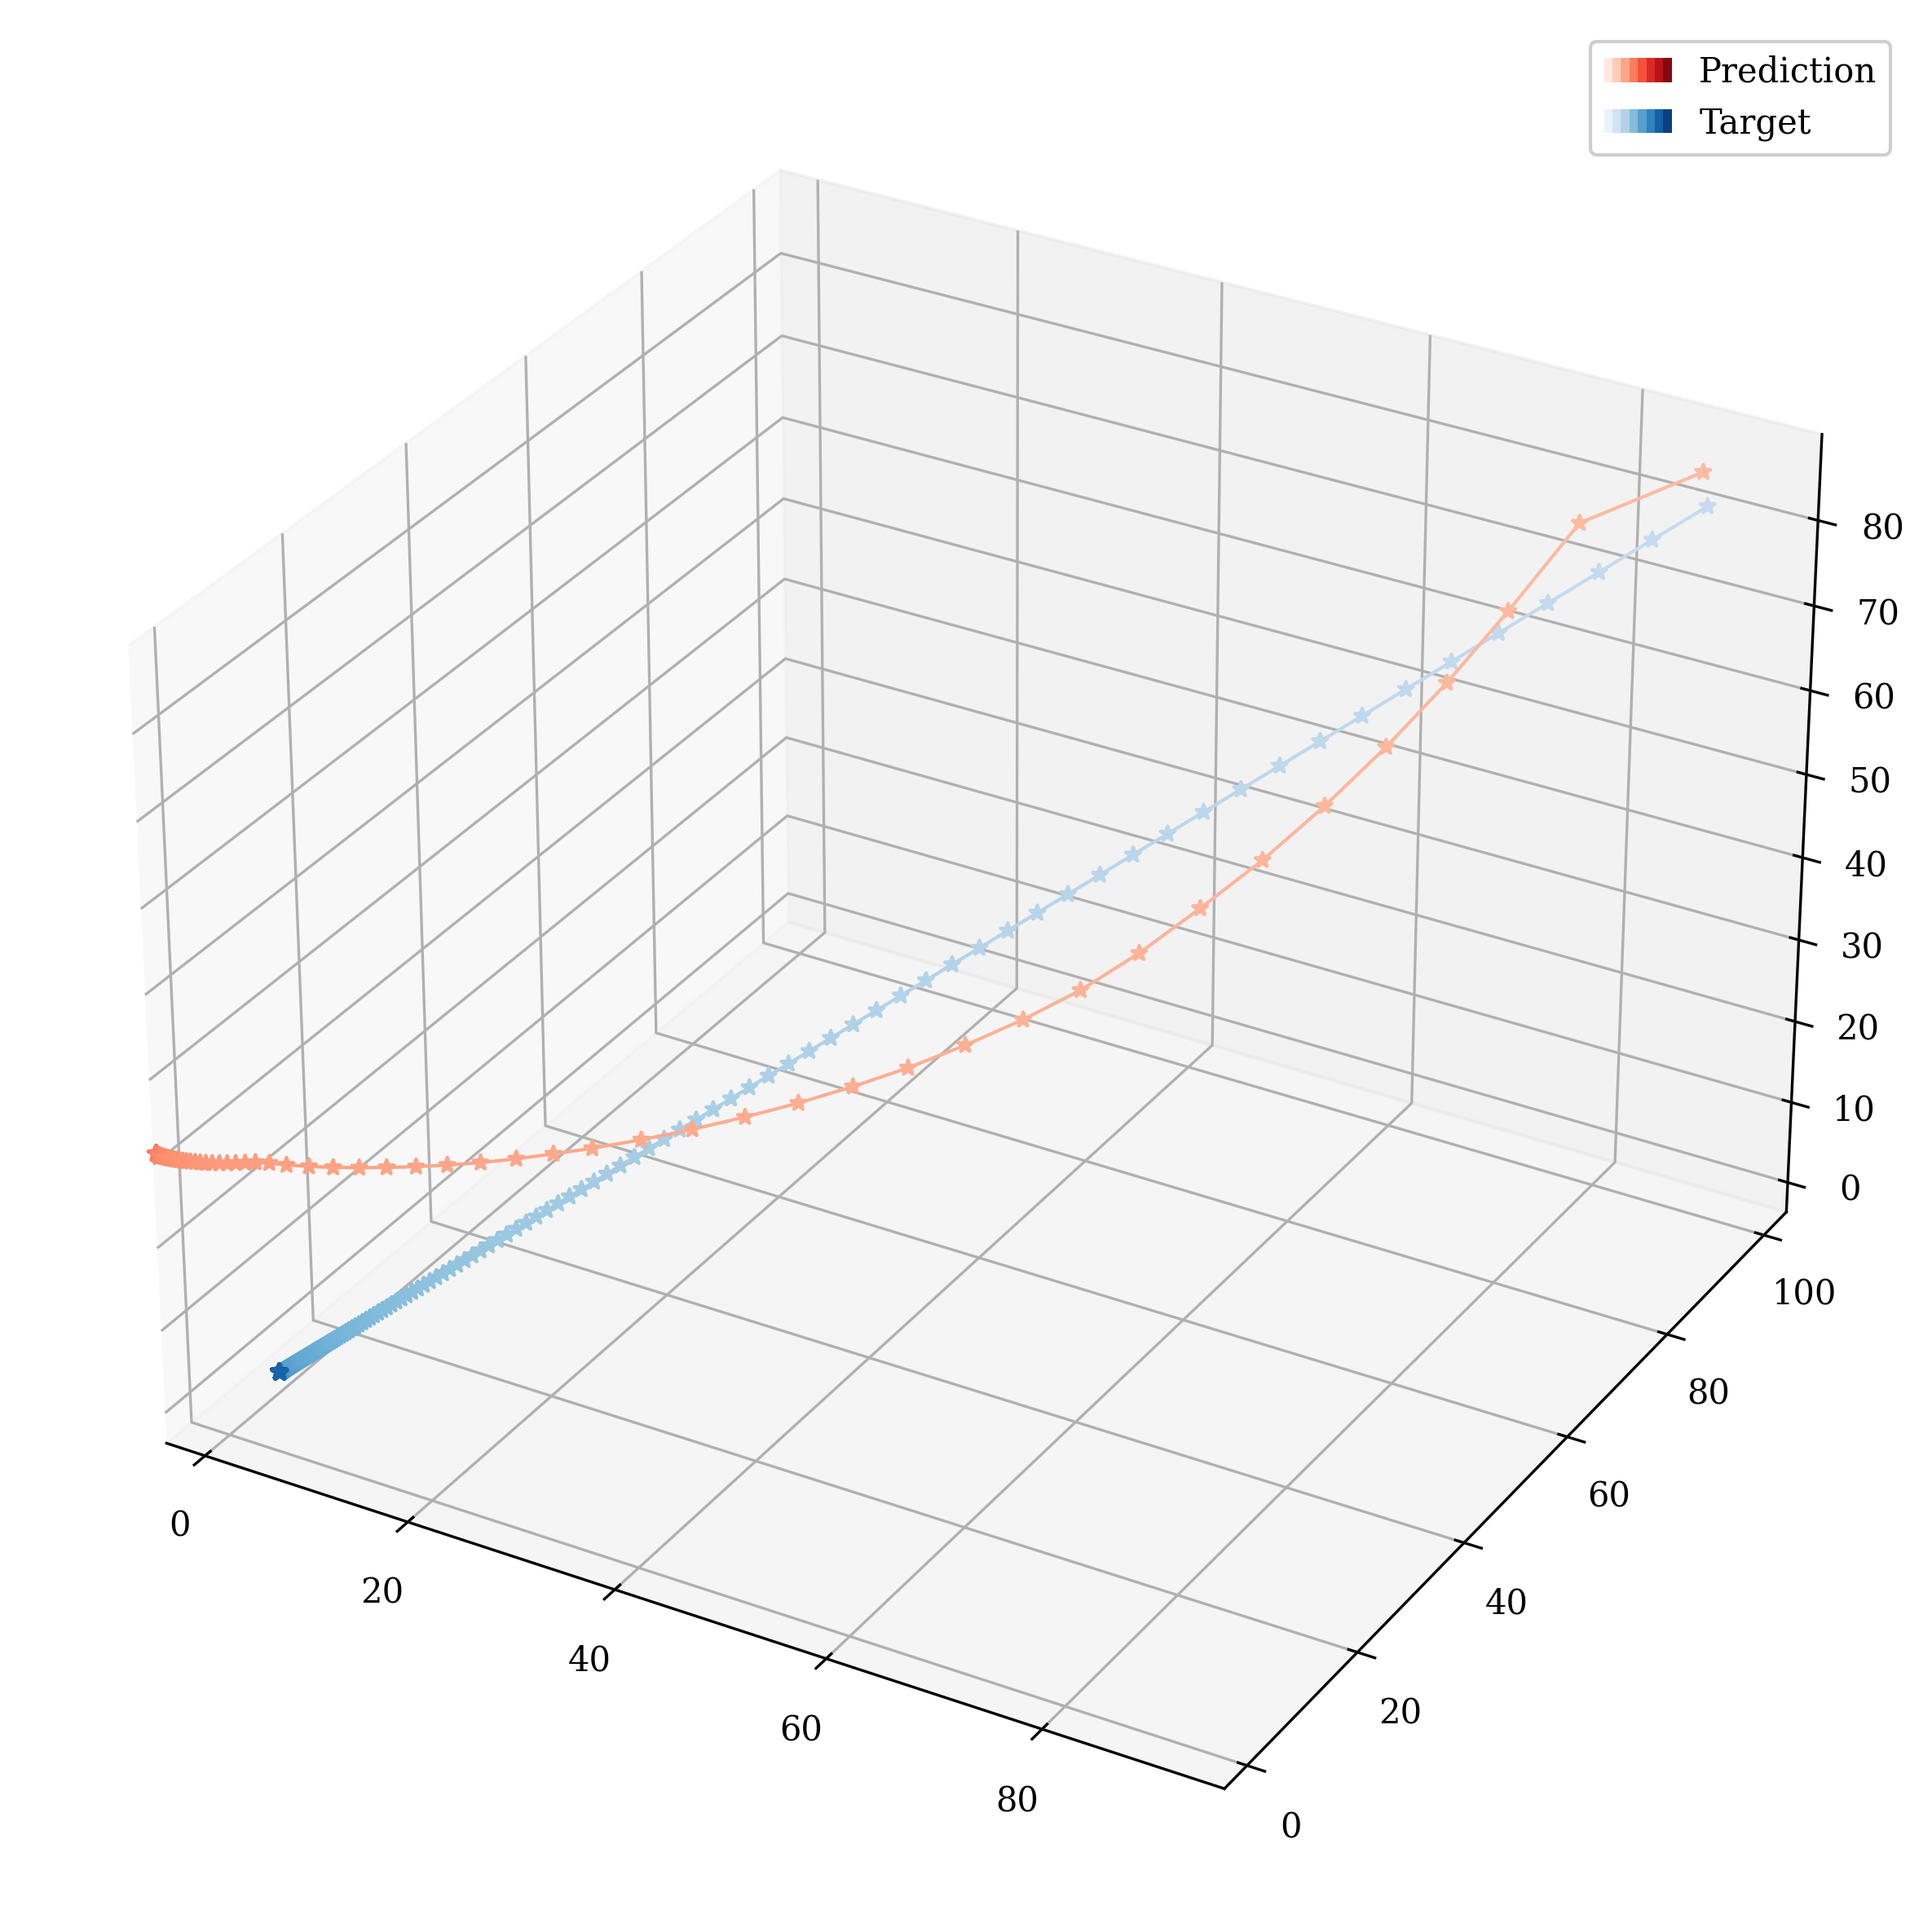

Validation prediction for epoch: 50


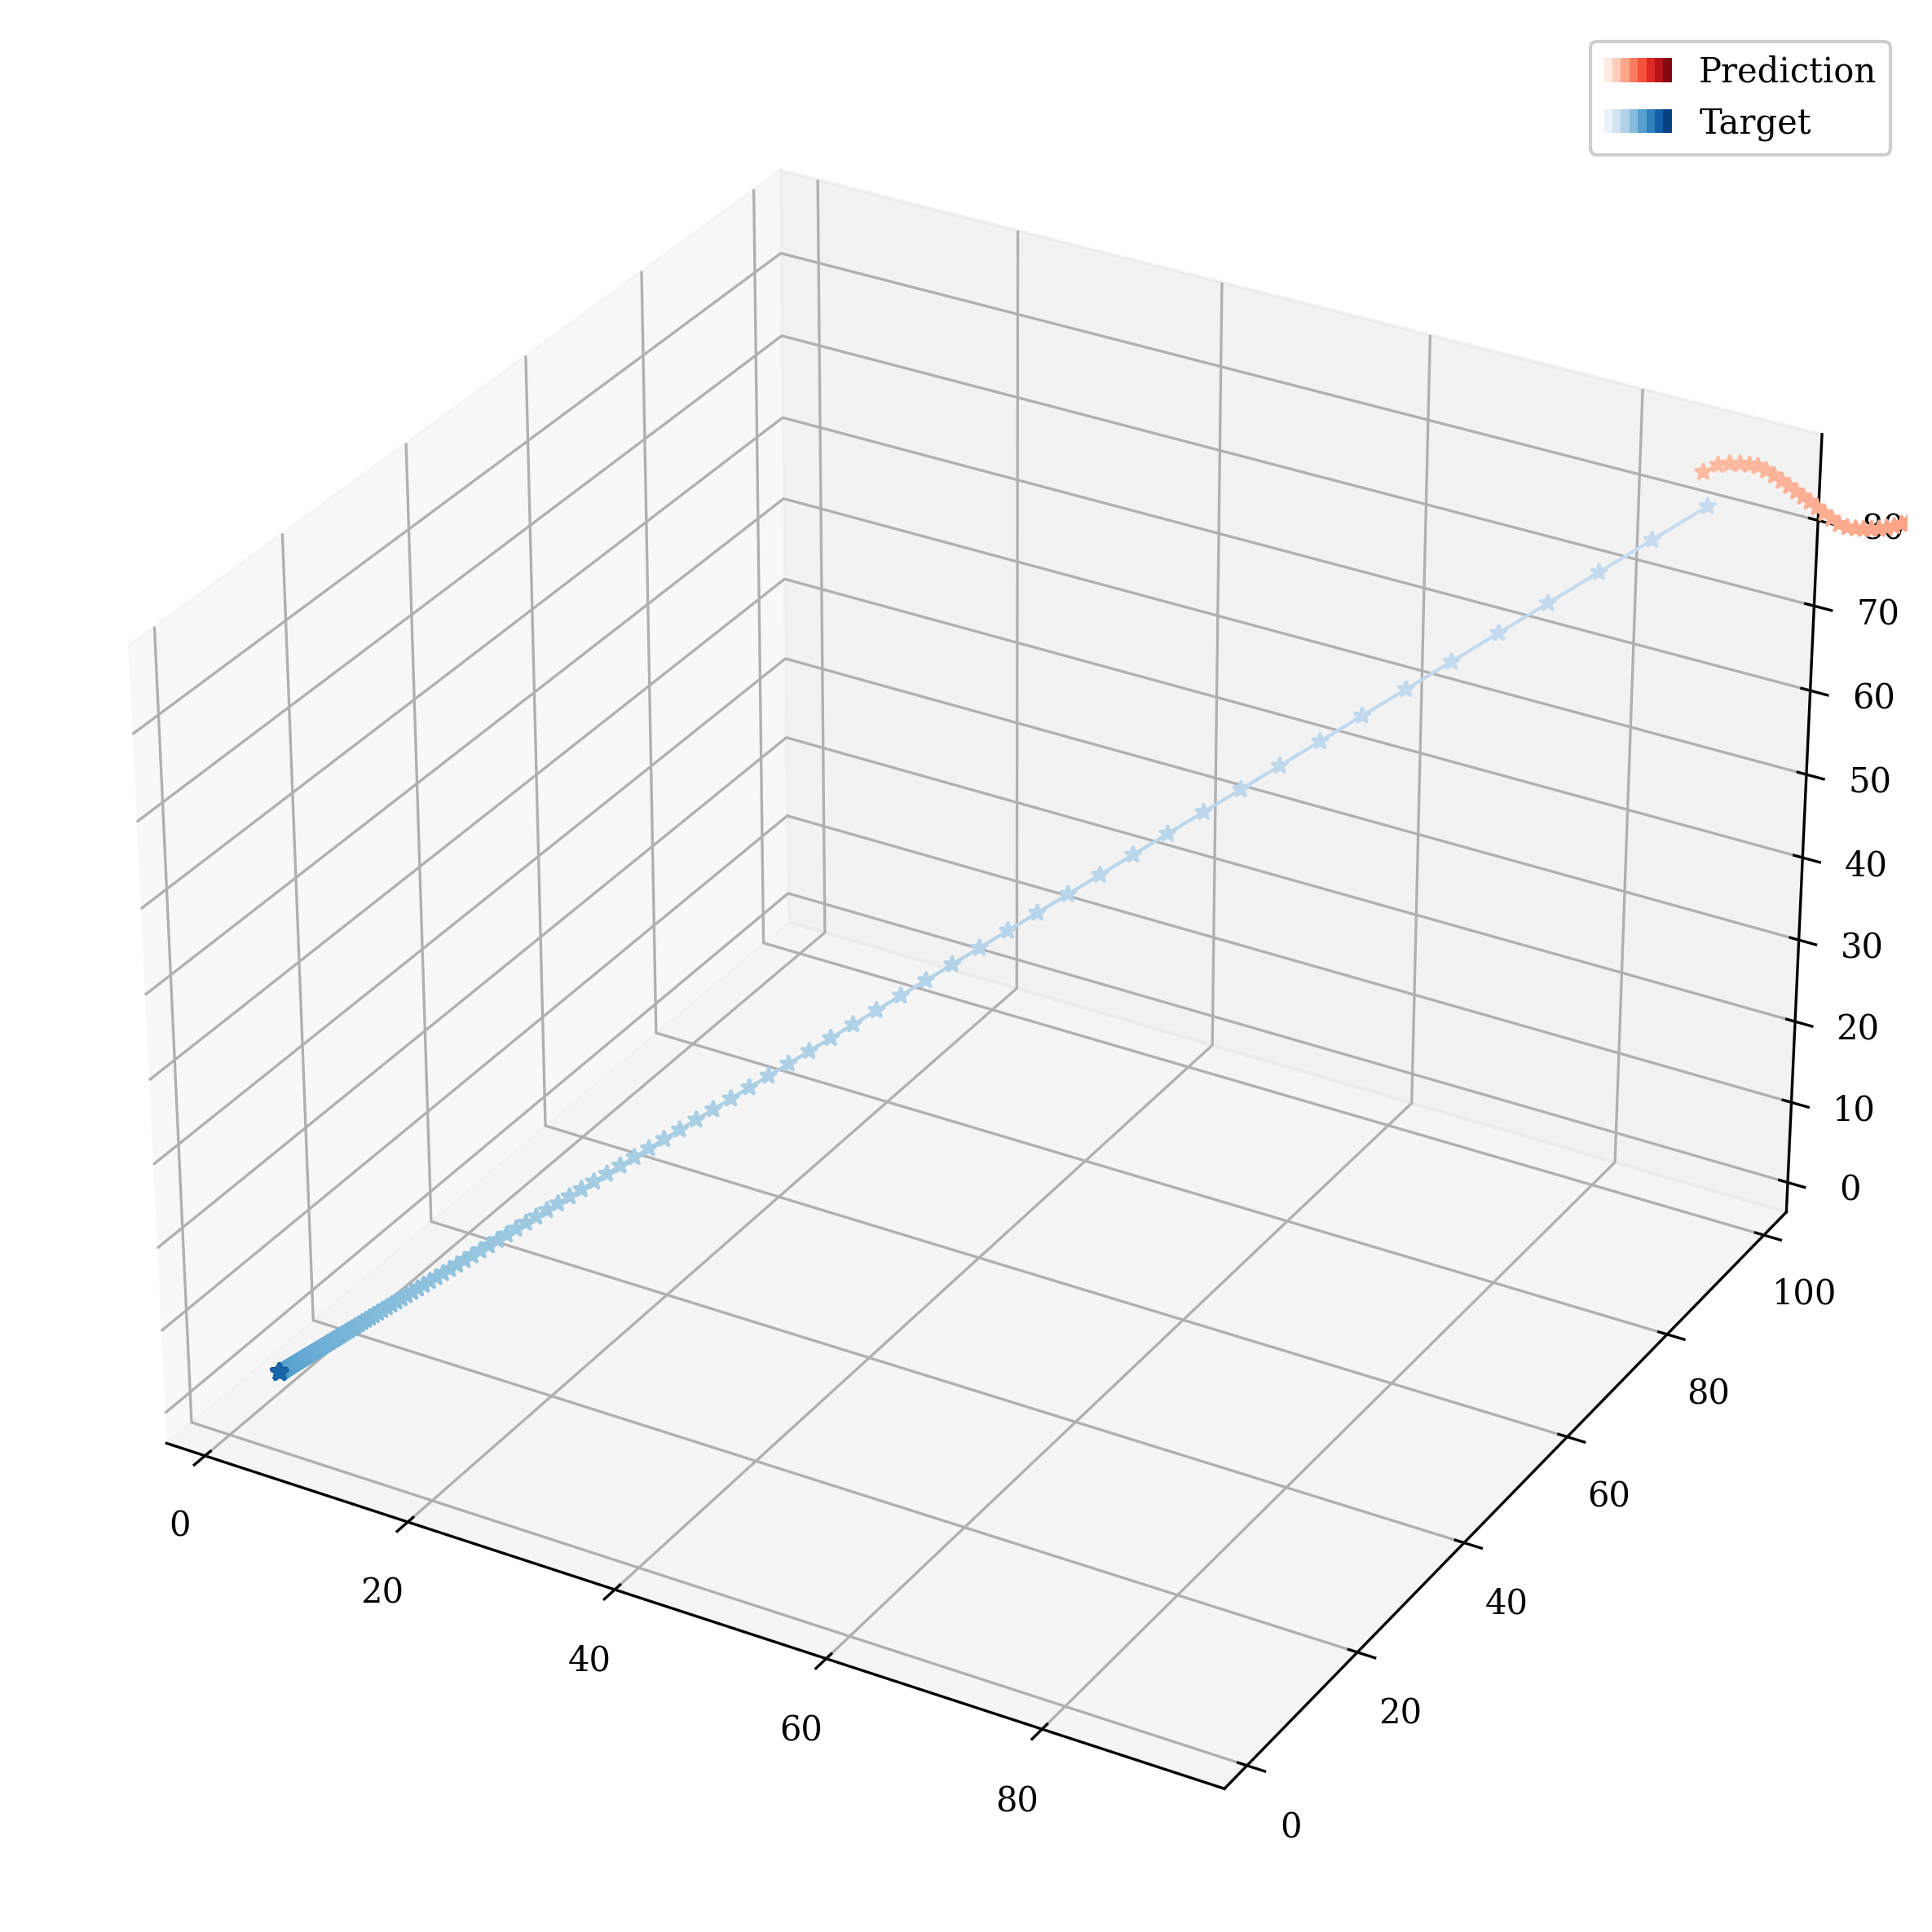

Validation prediction for epoch: 100


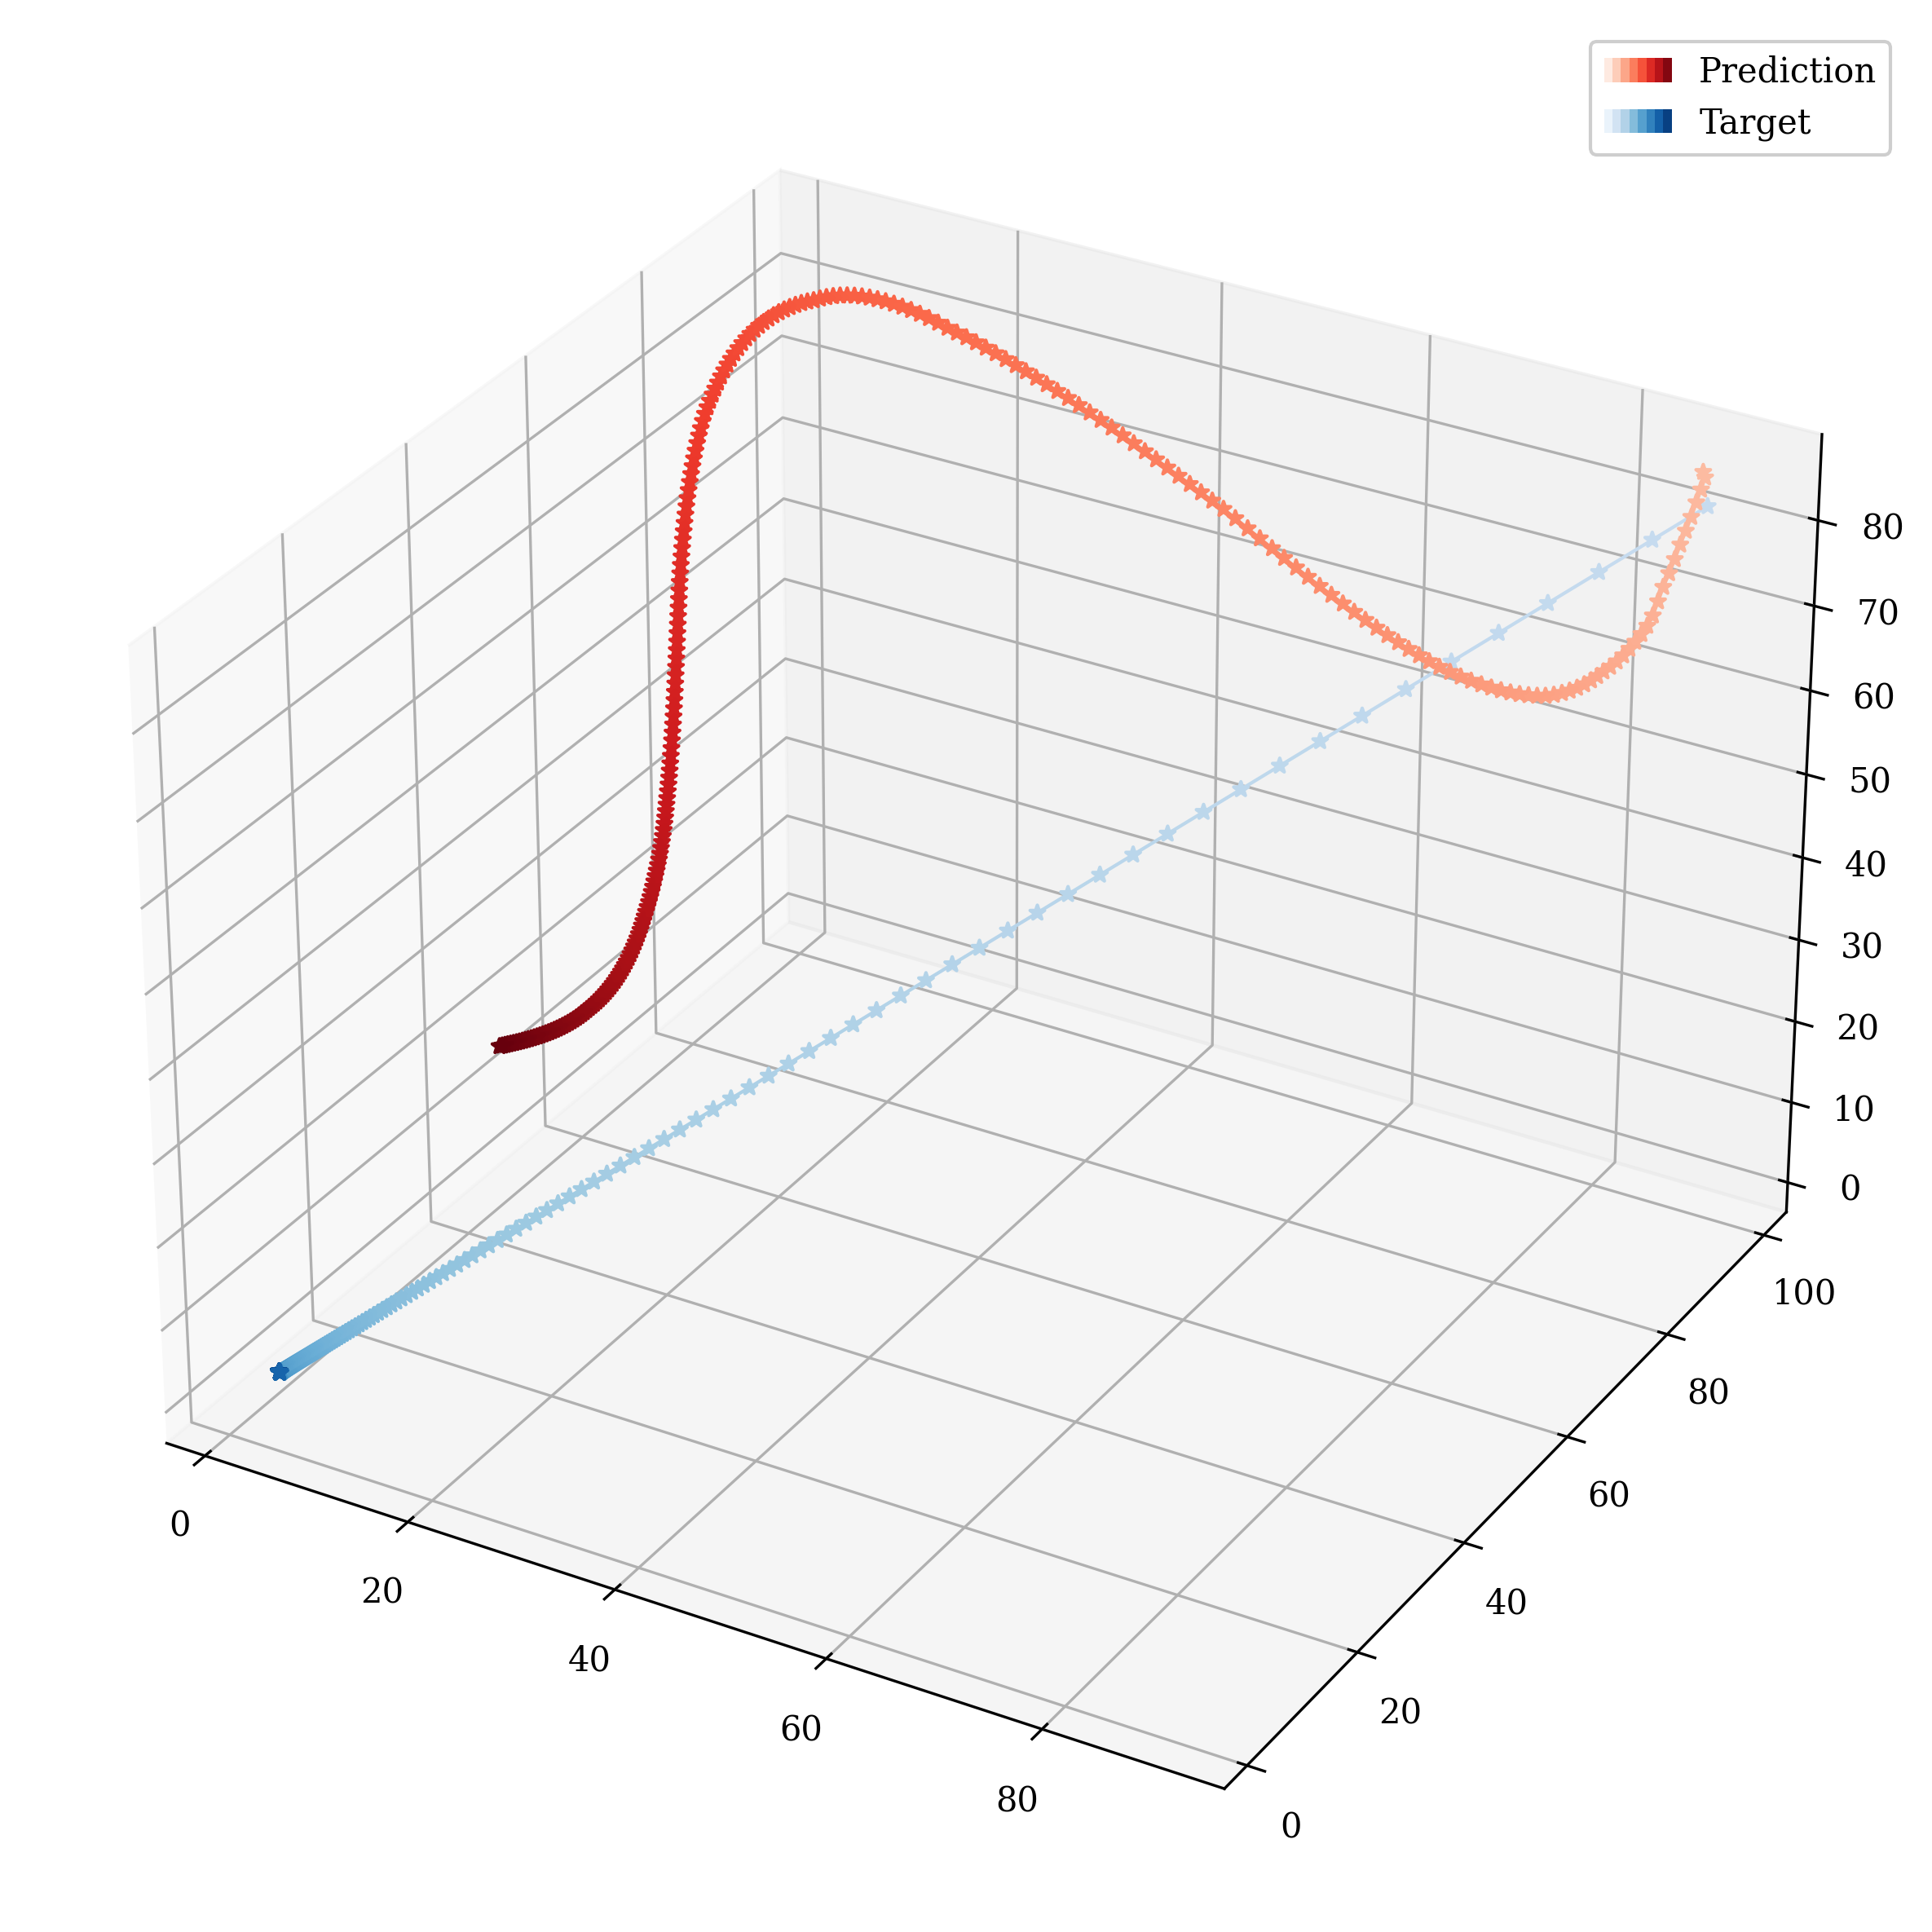

Validation prediction for epoch: 150


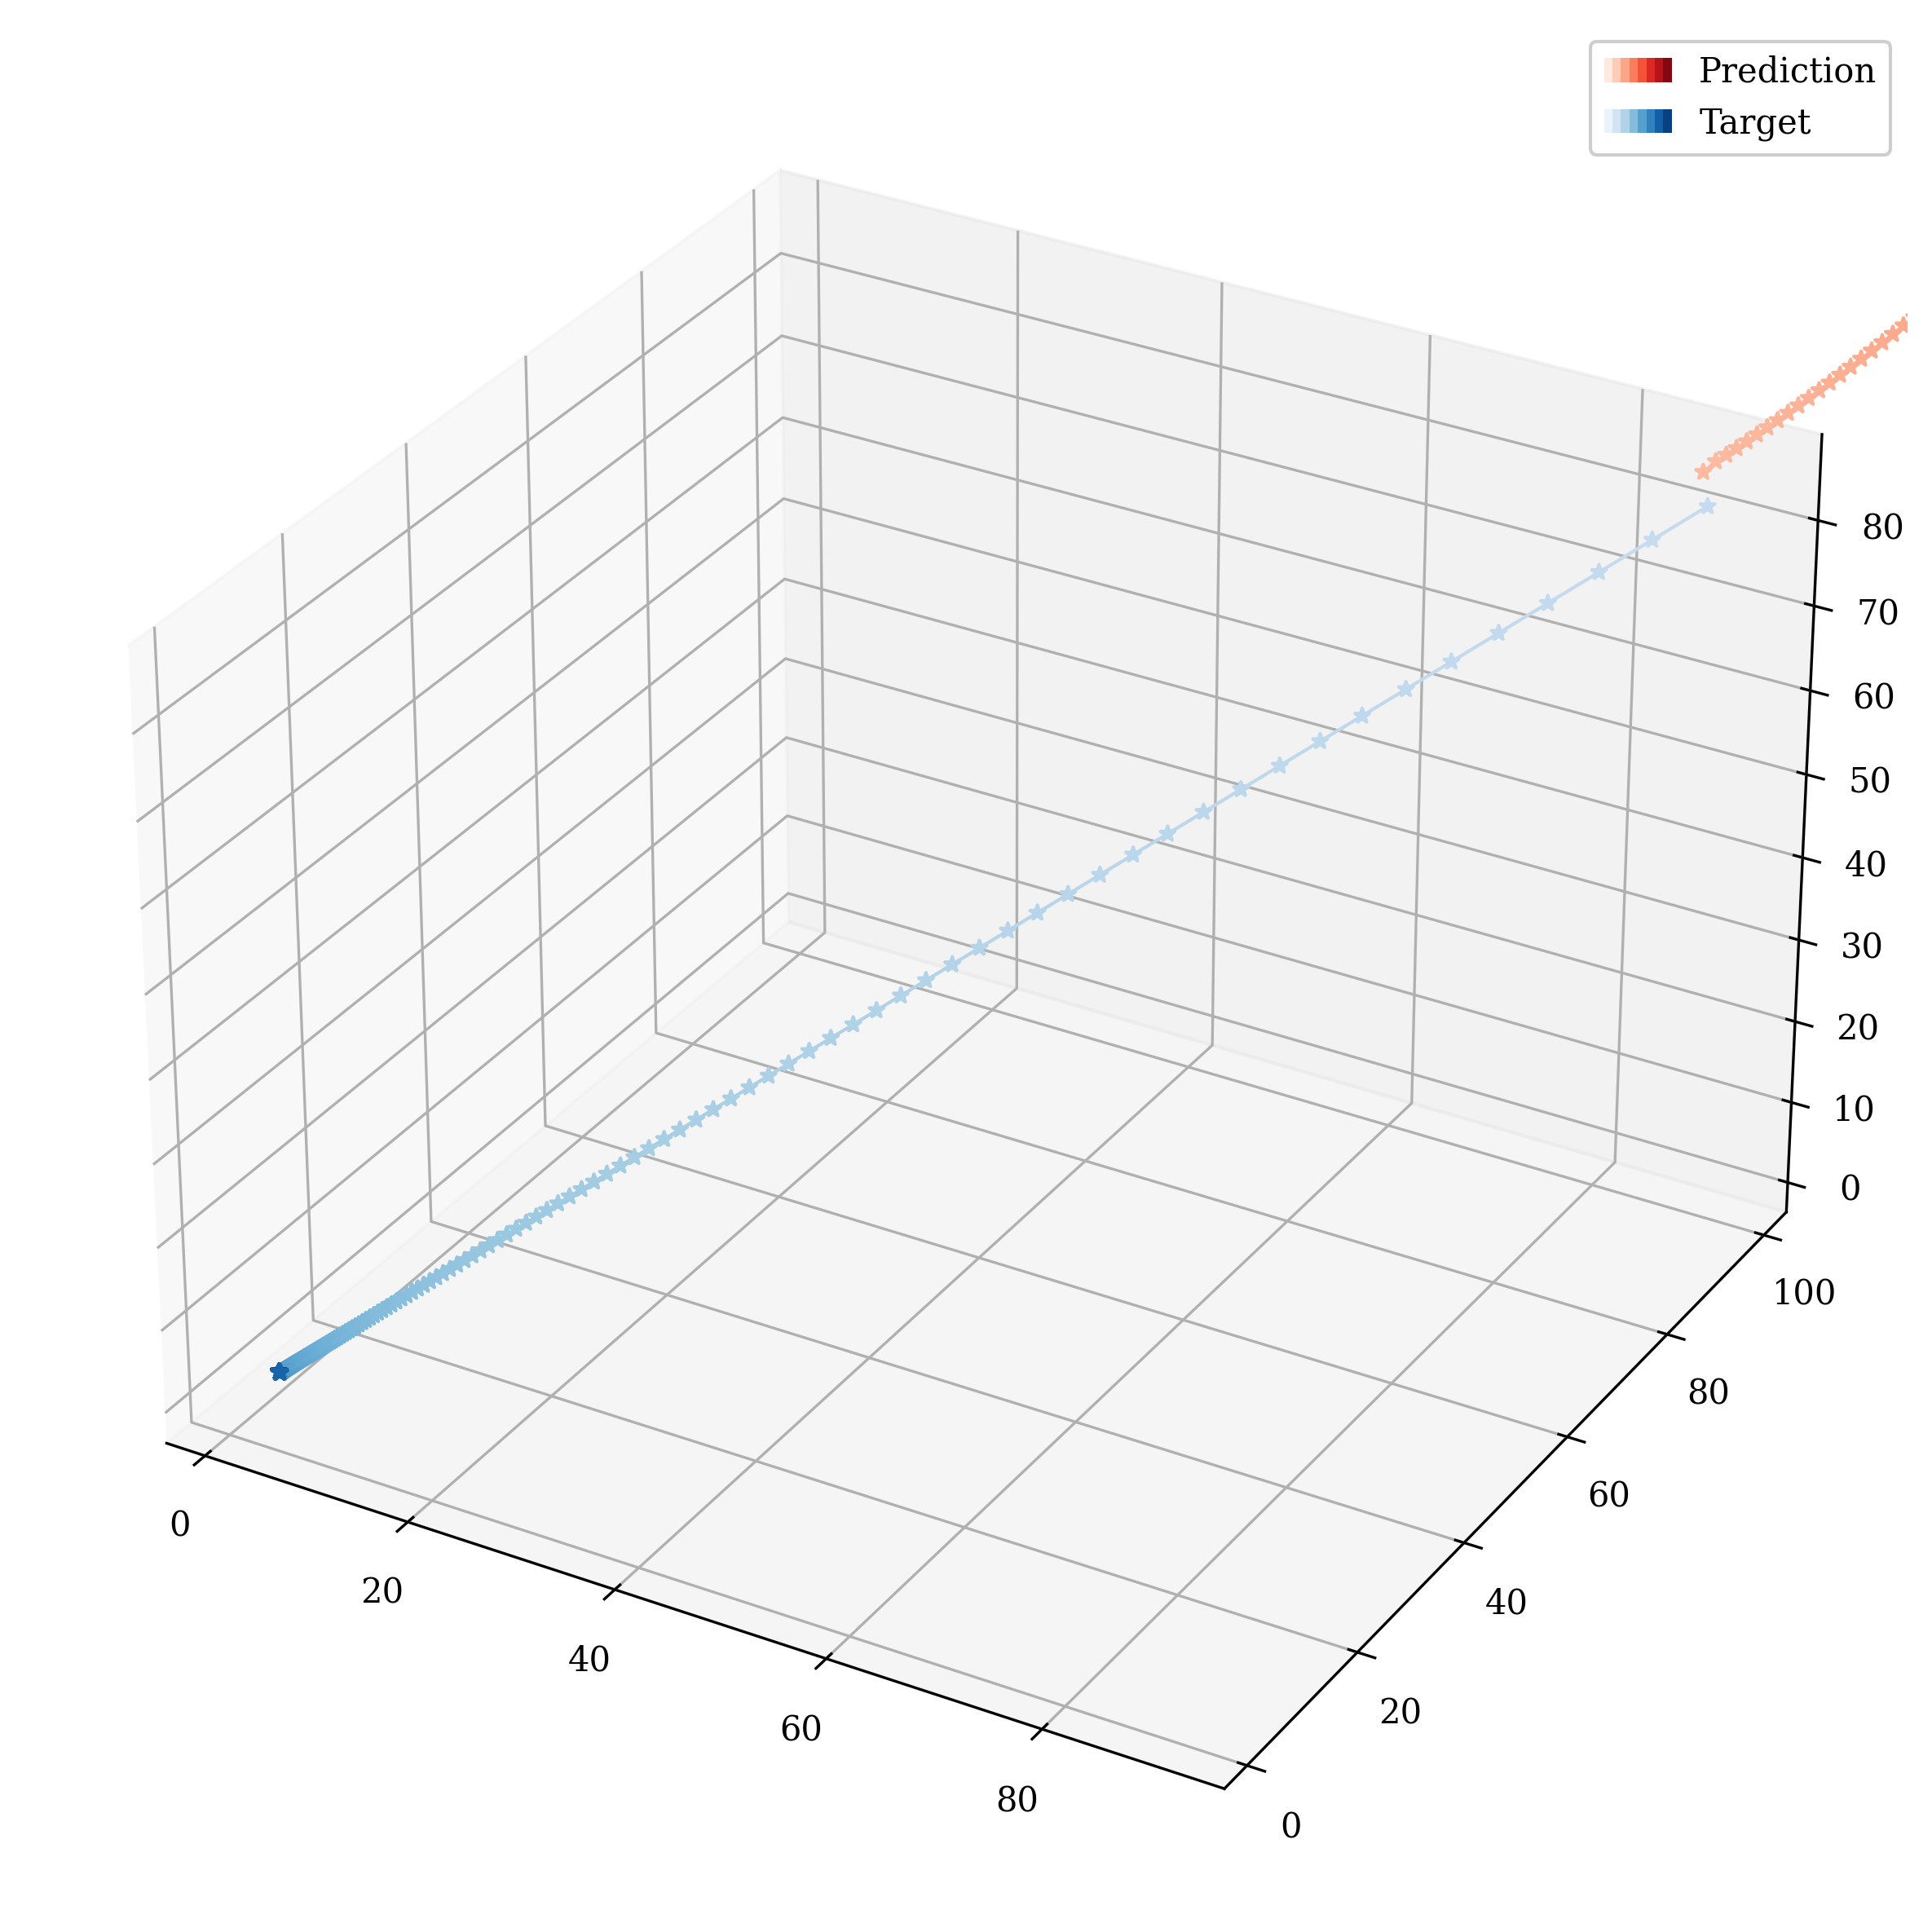

Validation prediction for epoch: 200


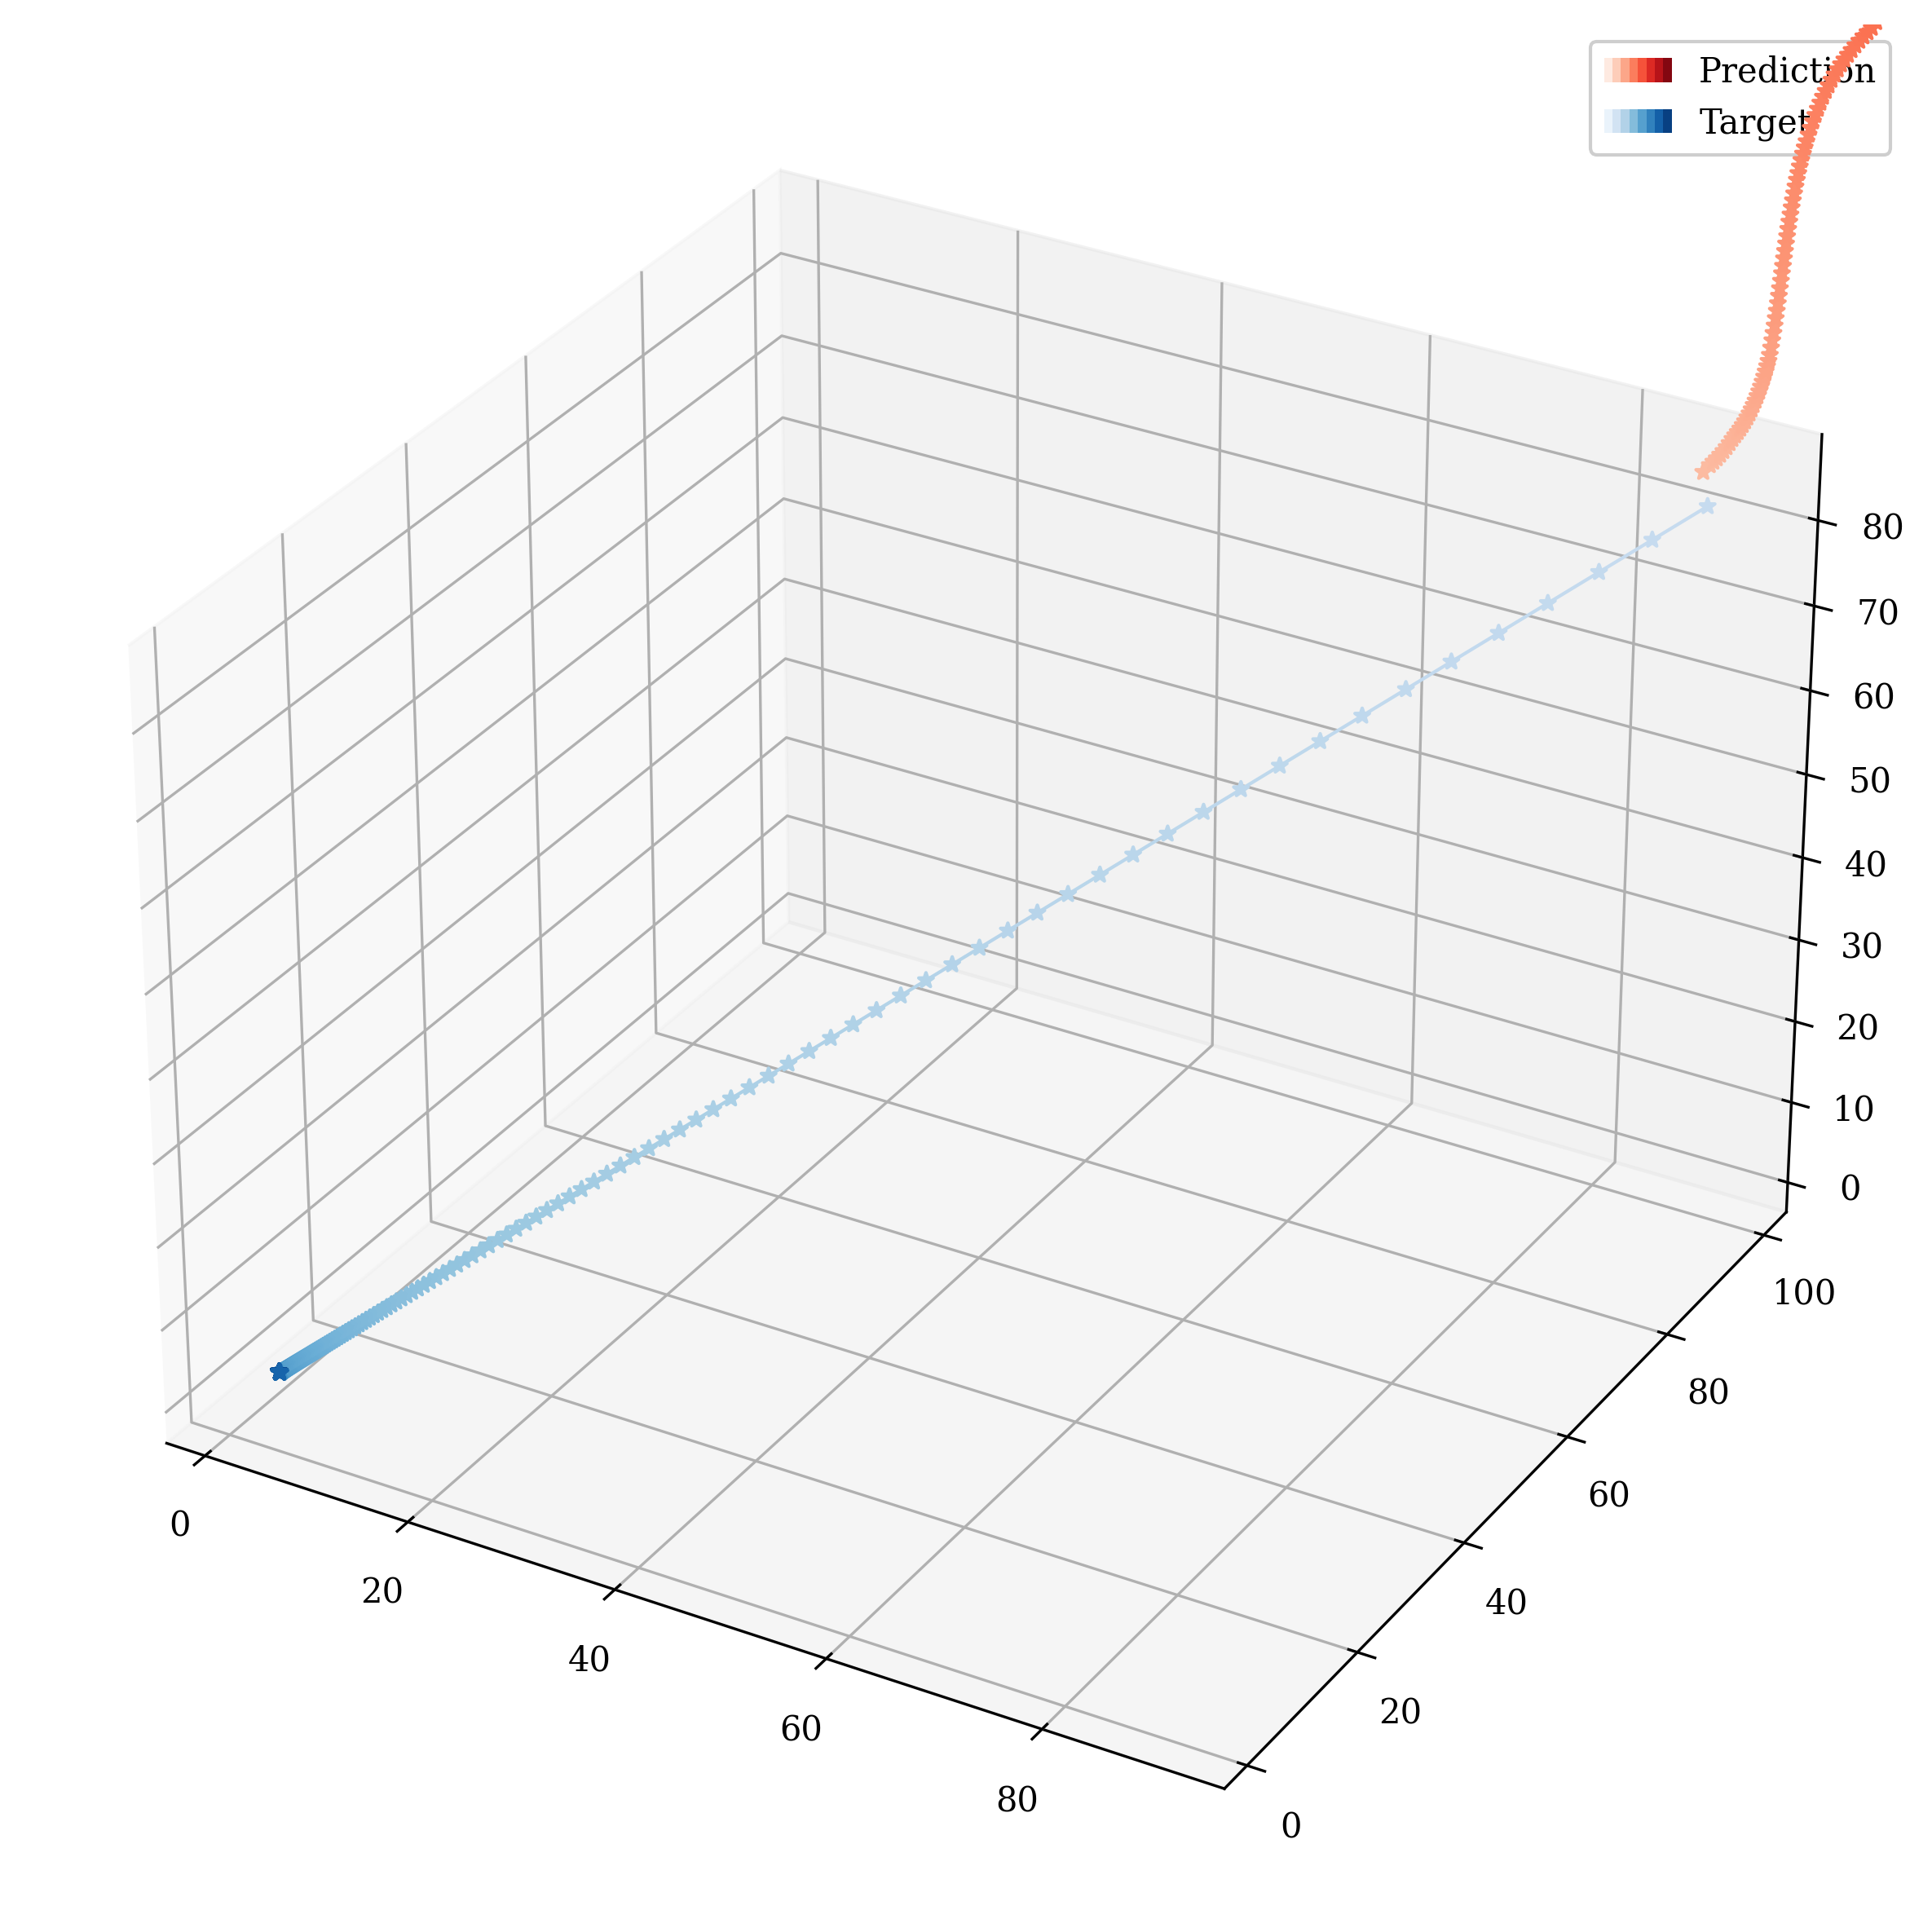

In [ ]:
from IPython.display import Image, display

for epoch in [1, 50, 100, 150, 200]:
  print('Validation prediction for epoch: {:d}'.format(epoch))
  file_path = './outputs/transformer_rossler/ntrain2048_epochs200_batch32/viz/rosslerPred1_{:d}.png'.format(epoch)
  display(Image(file_path, width=300, height=300))